In [26]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [1]:
import json

with open('trump_data.json', 'r') as JSON:
    trump = json.load(JSON)

In [5]:
trump[0]

{'created_at': 'Sun Sep 01 19:35:40 +0000 2019',
 'id': 1168246061951004672,
 'id_str': '1168246061951004672',
 'full_text': 'Pray for the people in the Bahamas. Being hit like never before, Category 5.  Almost 200 MPH winds.',
 'truncated': False,
 'display_text_range': [0, 99],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 25073877,
  'id_str': '25073877',
  'name': 'Donald J. Trump',
  'screen_name': 'realDonaldTrump',
  'location': 'Washington, DC',
  'description': '45th President of the United States of America🇺🇸',
  'url': 'https://t.co/OMxB0x7xC5',
  'entities': {'url': {'urls': [{'url': 'https://t.co/OMxB0x7xC5',
      'expanded_url': 'http://www.Instagram.com/realDonald

In [7]:
trump[1]

{'created_at': 'Sun Sep 01 18:57:40 +0000 2019',
 'id': 1168236497901957122,
 'id_str': '1168236497901957122',
 'full_text': 'RT @WhiteHouse: President @realDonaldTrump: “I ask everyone in Hurricane Dorian’s path to heed all warnings and evacuation orders from loca…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'WhiteHouse',
    'name': 'The White House',
    'id': 822215673812119553,
    'id_str': '822215673812119553',
    'indices': [3, 14]},
   {'screen_name': 'realDonaldTrump',
    'name': 'Donald J. Trump',
    'id': 25073877,
    'id_str': '25073877',
    'indices': [26, 42]}],
  'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 25073877,
  'id_str': 

In [22]:
def text_get(tweet):
    if 'retweeted_status' in tweet:
        return (tweet['retweeted_status']['full_text'], 1)
    else:
        return (tweet['full_text'], 0)

In [23]:
def gather_documents(tweet_data):
    documents = []
    for tweet in tweet_data:
        documents.append(text_get(tweet))
    return documents

In [24]:
trump_docs = gather_documents(trump)

In [25]:
trump_docs

[('Pray for the people in the Bahamas. Being hit like never before, Category 5.  Almost 200 MPH winds.',
  0),
 ('President @realDonaldTrump: “I ask everyone in Hurricane Dorian’s path to heed all warnings and evacuation orders from local authorities.” https://t.co/rg7uxs18GG',
  1),
 ('“On behalf of all Americans, I’d like to express my deepest sympathies and sorrow for the victims and their families. We ask God to comfort and heal those who are suffering and we hope that there will be a full and quick recovery of the injured.“ https://t.co/qD6ONHjLZ4',
  1),
 ('Great job by Texas Law Enforcement and First Responders in handling the terrible shooting tragedy yesterday. Thank you also to the FBI, @GregAbbott_TX and all others. A very tough and sad situation!',
  0),
 ('In addition to Florida - South Carolina, North Carolina, Georgia, and Alabama, will most likely be hit (much) harder than anticipated. Looking like one of the largest hurricanes ever. Already category 5. BE CAREFUL! GOD 

In [21]:
rt_counter = 0
counter = 0
for tweet in trump:
    if 'retweeted_status' in tweet:
        rt_counter += 1
    else:
        counter += 1
print(f'{rt_counter} retweets')
print(f'{counter} original tweets')

1059 retweets
2173 original tweets


In [30]:
df = pd.DataFrame(trump_docs)
df.columns = ['text', 'isRetweet']

In [31]:
df.head()

,text,isRetweet
0,Pray for the people in the Bahamas. Being hit ...,0
1,President @realDonaldTrump: “I ask everyone in...,1
2,"“On behalf of all Americans, I’d like to expre...",1
3,Great job by Texas Law Enforcement and First R...,0
4,"In addition to Florida - South Carolina, North...",0


In [36]:
docs_no_rt = list(df[df.isRetweet == 0].text)

In [53]:
docs_no_rt

['Pray for the people in the Bahamas. Being hit like never before, Category 5.  Almost 200 MPH winds.',
 'Great job by Texas Law Enforcement and First Responders in handling the terrible shooting tragedy yesterday. Thank you also to the FBI, @GregAbbott_TX and all others. A very tough and sad situation!',
 'In addition to Florida - South Carolina, North Carolina, Georgia, and Alabama, will most likely be hit (much) harder than anticipated. Looking like one of the largest hurricanes ever. Already category 5. BE CAREFUL! GOD BLESS EVERYONE!',
 'This is only the beginning! https://t.co/mFrtBPtCcO',
 'I have not forgotten that when it was announced that I was going to do The Apprentice, and when it then became a big hit, helping NBC’s failed lineup greatly, @DebraMessing came up to me at an Upfront &amp; profusely thanked me, even calling me “Sir.” How times have changed!',
 '“Comey and McCabe (and more) are Dirty Cops.” Joe DiGenova',
 '....reports are coming. Comey very vulnerable. But w

In [50]:
import re
def remove_links(text):
    return re.sub('http://\S+|https://\S+', '', text)

In [55]:
docs = [remove_links(x) for x in docs_no_rt]

In [56]:
docs

['Pray for the people in the Bahamas. Being hit like never before, Category 5.  Almost 200 MPH winds.',
 'Great job by Texas Law Enforcement and First Responders in handling the terrible shooting tragedy yesterday. Thank you also to the FBI, @GregAbbott_TX and all others. A very tough and sad situation!',
 'In addition to Florida - South Carolina, North Carolina, Georgia, and Alabama, will most likely be hit (much) harder than anticipated. Looking like one of the largest hurricanes ever. Already category 5. BE CAREFUL! GOD BLESS EVERYONE!',
 'This is only the beginning! ',
 'I have not forgotten that when it was announced that I was going to do The Apprentice, and when it then became a big hit, helping NBC’s failed lineup greatly, @DebraMessing came up to me at an Upfront &amp; profusely thanked me, even calling me “Sir.” How times have changed!',
 '“Comey and McCabe (and more) are Dirty Cops.” Joe DiGenova',
 '....reports are coming. Comey very vulnerable. But where is the Supreme Cou

In [58]:
df_test = pd.DataFrame(trump)

In [70]:
df_test.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user', 'withheld_in_countries'],
      dtype='object')

In [73]:
df_test[['full_text', 'created_at', 'retweeted_status']].head(50)

,full_text,created_at,retweeted_status
0,Pray for the people in the Bahamas. Being hit ...,Sun Sep 01 19:35:40 +0000 2019,NaN
1,RT @WhiteHouse: President @realDonaldTrump: “I...,Sun Sep 01 18:57:40 +0000 2019,{'created_at': 'Sun Sep 01 18:43:15 +0000 2019...
2,"RT @WhiteHouse: “On behalf of all Americans, I...",Sun Sep 01 18:57:30 +0000 2019,{'created_at': 'Sun Sep 01 18:08:14 +0000 2019...
3,Great job by Texas Law Enforcement and First R...,Sun Sep 01 15:07:26 +0000 2019,NaN
4,"In addition to Florida - South Carolina, North...",Sun Sep 01 14:51:46 +0000 2019,NaN
5,RT @NWSSanAntonio: 🛰️ Satellite imagery this m...,Sun Sep 01 14:11:54 +0000 2019,{'created_at': 'Sun Sep 01 13:19:08 +0000 2019...
6,RT @weatherchannel: BREAKING: #HurricaneDorian...,Sun Sep 01 14:11:02 +0000 2019,{'created_at': 'Sun Sep 01 11:56:16 +0000 2019...
7,RT @ABC: LATEST: Hurricane Dorian has intensif...,Sun Sep 01 14:10:52 +0000 2019,{'created_at': 'Sun Sep 01 13:50:00 +0000 2019...
8,"RT @GovRonDeSantis: Thank you, @USACEHQ. \n\nO...",Sun Sep 01 14:09:50 +0000 2019,{'created_at': 'Sat Aug 31 18:53:00 +0000 2019...
9,RT @GovRonDeSantis: While #Dorian’s path is ge...,Sun Sep 01 14:09:33 +0000 2019,{'created_at': 'Sat Aug 31 23:35:12 +0000 2019...


In [74]:
trump[25:27]

[{'created_at': 'Sun Sep 01 12:58:44 +0000 2019',
  'id': 1168146167215079424,
  'id_str': '1168146167215079424',
  'full_text': '....reports are coming. Comey very vulnerable. But where is the Supreme Court. Where is Justice Roberts? If you lie to a court, you should be held in contempt. So, if you abused the FISA, you must be held accountable. I hope Justice Roberts will take action.” Jason Chaffetz, Fox',
  'truncated': False,
  'display_text_range': [0, 279],
  'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': 1168146165130518528,
  'in_reply_to_status_id_str': '1168146165130518528',
  'in_reply_to_user_id': 25073877,
  'in_reply_to_user_id_str': '25073877',
  'in_reply_to_screen_name': 'realDonaldTrump',
  'user': {'id': 25073877,
   'id_str': '25073877',
   'name': 'Donald J. Trump',
   'screen_name': 'realDonaldTrump',
   'locat

In [78]:
for i in range(len(docs)):
    if docs[i][:3] == '...':
        print(docs[i+1])
        print(docs[i])
        print()

“James Comey has been rebuked at the highest level, with much more to come. An IG Report doesn’t get any stronger, calling him dangerous, insubordinate. THANK GOODNESS THAT DONALD TRUMP WAS ELECTED, BECAUSE IF HE WASN’T ELECTED, THESE PEOPLE WOULD STILL BE IN POWER. Two more.....
....reports are coming. Comey very vulnerable. But where is the Supreme Court. Where is Justice Roberts? If you lie to a court, you should be held in contempt. So, if you abused the FISA, you must be held accountable. I hope Justice Roberts will take action.” Jason Chaffetz, Fox

Peter Morici, Economist: Tariffs will not impact American consumers that much because the Chinese currency has gone down, which gives our importers a discount. Importers can find suppliers outside of China. Absolutely worth it, we don’t want to be servants to the Chinese! This...
....is about American Freedom. Redirect the supply chain. There is no reason to buy everything from China!

Being scolded by failed former “Intelligence” off

In [80]:
test = ['...abeoije','jfoaeijf...','fjoiejf','afjeoijv','...aieoje','lklkje...']

In [95]:
def combine_tweets(uncombined):
    combined = []
    check = False
    for i in range(len(uncombined)):
        if check == False:
            if uncombined[i][:3] == '...':
                combined.append(uncombined[i+1][:-3] + uncombined[i][3:])
                check = True
            else:
                combined.append(uncombined[i])
        else:
            check = False
    return combined

In [97]:
combined_docs = combine_tweets(docs)

In [98]:
combined_docs

['Pray for the people in the Bahamas. Being hit like never before, Category 5.  Almost 200 MPH winds.',
 'Great job by Texas Law Enforcement and First Responders in handling the terrible shooting tragedy yesterday. Thank you also to the FBI, @GregAbbott_TX and all others. A very tough and sad situation!',
 'In addition to Florida - South Carolina, North Carolina, Georgia, and Alabama, will most likely be hit (much) harder than anticipated. Looking like one of the largest hurricanes ever. Already category 5. BE CAREFUL! GOD BLESS EVERYONE!',
 'This is only the beginning! ',
 'I have not forgotten that when it was announced that I was going to do The Apprentice, and when it then became a big hit, helping NBC’s failed lineup greatly, @DebraMessing came up to me at an Upfront &amp; profusely thanked me, even calling me “Sir.” How times have changed!',
 '“Comey and McCabe (and more) are Dirty Cops.” Joe DiGenova',
 '“James Comey has been rebuked at the highest level, with much more to come.

In [99]:
np.save('trump_tweets_nort_nolinks_combined', combined_docs)

In [100]:
import nltk

In [102]:
sr

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [159]:
import string
punctuations = string.punctuation[:21] +string.punctuation[22:]

from nltk.corpus import stopwords
sr = stopwords.words('english')

table = str.maketrans('', '', punctuations)
docs_tokenized = [[token.lower().translate(table) for token in doc.split() if not token in sr] for doc in combined_docs]

In [160]:
docs_tokenized

[['pray',
  'people',
  'bahamas',
  'being',
  'hit',
  'like',
  'never',
  'before',
  'category',
  '5',
  'almost',
  '200',
  'mph',
  'winds'],
 ['great',
  'job',
  'texas',
  'law',
  'enforcement',
  'first',
  'responders',
  'handling',
  'terrible',
  'shooting',
  'tragedy',
  'yesterday',
  'thank',
  'also',
  'fbi',
  '@gregabbotttx',
  'others',
  'a',
  'tough',
  'sad',
  'situation'],
 ['in',
  'addition',
  'florida',
  '',
  'south',
  'carolina',
  'north',
  'carolina',
  'georgia',
  'alabama',
  'likely',
  'hit',
  'much',
  'harder',
  'anticipated',
  'looking',
  'like',
  'one',
  'largest',
  'hurricanes',
  'ever',
  'already',
  'category',
  '5',
  'be',
  'careful',
  'god',
  'bless',
  'everyone'],
 ['this', 'beginning'],
 ['i',
  'forgotten',
  'announced',
  'i',
  'going',
  'the',
  'apprentice',
  'became',
  'big',
  'hit',
  'helping',
  'nbc’s',
  'failed',
  'lineup',
  'greatly',
  '@debramessing',
  'came',
  'upfront',
  'amp',
  'prof

In [164]:
clean_docs = []
for tokens in docs_tokenized:
    doc_cleaned = []
    for token in tokens:
        if token not in sr:
            doc_cleaned.append(token)
    clean_docs.append(doc_cleaned)

In [165]:
clean_docs

[['pray',
  'people',
  'bahamas',
  'hit',
  'like',
  'never',
  'category',
  '5',
  'almost',
  '200',
  'mph',
  'winds'],
 ['great',
  'job',
  'texas',
  'law',
  'enforcement',
  'first',
  'responders',
  'handling',
  'terrible',
  'shooting',
  'tragedy',
  'yesterday',
  'thank',
  'also',
  'fbi',
  '@gregabbotttx',
  'others',
  'tough',
  'sad',
  'situation'],
 ['addition',
  'florida',
  '',
  'south',
  'carolina',
  'north',
  'carolina',
  'georgia',
  'alabama',
  'likely',
  'hit',
  'much',
  'harder',
  'anticipated',
  'looking',
  'like',
  'one',
  'largest',
  'hurricanes',
  'ever',
  'already',
  'category',
  '5',
  'careful',
  'god',
  'bless',
  'everyone'],
 ['beginning'],
 ['forgotten',
  'announced',
  'going',
  'apprentice',
  'became',
  'big',
  'hit',
  'helping',
  'nbc’s',
  'failed',
  'lineup',
  'greatly',
  '@debramessing',
  'came',
  'upfront',
  'amp',
  'profusely',
  'thanked',
  'even',
  'calling',
  '“sir”',
  'times',
  'changed'

In [166]:
np.save('trump_tweets_tokenized', clean_docs)

In [167]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [[porter.stem(token) for token in doc] for doc in clean_docs]

In [168]:
np.save('trump_tweets_stemmed', stemmed)

In [169]:
flattened_tokens = [y for x in clean_docs for y in x]

In [170]:
flattened_tokens

['pray',
 'people',
 'bahamas',
 'hit',
 'like',
 'never',
 'category',
 '5',
 'almost',
 '200',
 'mph',
 'winds',
 'great',
 'job',
 'texas',
 'law',
 'enforcement',
 'first',
 'responders',
 'handling',
 'terrible',
 'shooting',
 'tragedy',
 'yesterday',
 'thank',
 'also',
 'fbi',
 '@gregabbotttx',
 'others',
 'tough',
 'sad',
 'situation',
 'addition',
 'florida',
 '',
 'south',
 'carolina',
 'north',
 'carolina',
 'georgia',
 'alabama',
 'likely',
 'hit',
 'much',
 'harder',
 'anticipated',
 'looking',
 'like',
 'one',
 'largest',
 'hurricanes',
 'ever',
 'already',
 'category',
 '5',
 'careful',
 'god',
 'bless',
 'everyone',
 'beginning',
 'forgotten',
 'announced',
 'going',
 'apprentice',
 'became',
 'big',
 'hit',
 'helping',
 'nbc’s',
 'failed',
 'lineup',
 'greatly',
 '@debramessing',
 'came',
 'upfront',
 'amp',
 'profusely',
 'thanked',
 'even',
 'calling',
 '“sir”',
 'times',
 'changed',
 '“comey',
 'mccabe',
 'dirty',
 'cops”',
 'joe',
 'digenova',
 '“james',
 'comey',
 

In [171]:
freq = nltk.FreqDist(flattened_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

pray:5
people:267
bahamas:3
hit:18
like:100
never:155
category:4
5:9
almost:32
200:5
mph:1
winds:2
great:526
job:96
texas:22
law:37
enforcement:24
first:68
responders:8
handling:4
terrible:29
shooting:6
tragedy:1
yesterday:21
thank:191
also:73
fbi:32
@gregabbotttx:1
others:57
tough:16
sad:25
situation:8
addition:5
florida:25
:221
south:16
carolina:24
north:38
georgia:4
alabama:5
likely:2
much:138
harder:5
anticipated:3
looking:42
one:118
largest:6
hurricanes:4
ever:86
already:29
careful:5
god:21
bless:15
everyone:34
beginning:10
forgotten:6
announced:12
going:74
apprentice:4
became:10
big:162
helping:17
nbc’s:1
failed:24
lineup:1
greatly:15
@debramessing:1
came:18
upfront:1
amp:411
profusely:1
thanked:1
even:113
calling:8
“sir”:1
times:33
changed:7
“comey:2
mccabe:5
dirty:11
cops”:1
joe:36
digenova:1
“james:1
comey:22
rebuked:1
highest:17
level:20
come:50
ig:4
report:90
doesn’t:34
get:130
stronger:19
dangerous:20
insubordinate:1
goodness:3
donald:15
trump:127
elected:11
wasn’t:10
would

workers:10
craft:2
security:31
agreeing:1
voter:3
id:3
identification:1
play:16
meaningless:2
stuck:3
airport:2
buys:4
uninterested:1
audience:3
fraction:4
chris:12
cuomo:11
lunatic:1
ranting:1
raving:1
cursing:1
destroyed:3
liberal:5
defense:10
learn:4
complex:2
living:2
rigged:8
landed:2
speech:10
intelligence:13
troops:6
calm:4
problems:10
imagine:5
fit:3
print:2
grew:2
organization:7
driven:3
worse”:1
michael:11
goodwin:2
columnist:1
buying:6
“big”:1
red:3
flag:8
recent:8
rant:1
filthy:4
language:4
loss:4
shouldn’t:5
weapon:4
nuts:2
pumping:5
gift:1
fredo:1
hurts:2
curt:1
schilling:1
pitcher:1
arizona:4
learning:1
missile:1
explosion:2
similar:3
advanced:3
technology:3
“skyfall”:1
worried:1
air:8
facility:3
loyal:1
upset:4
seldom:4
return:7
calls:3
negop:1
ripped:2
nations:10
changing:4
talent:3
scarborough:1
angry:21
psycho:6
push:4
donny:3
humiliation:1
stay:17
rated:4
name:8
ambition:1
funny:4
deutsch:1
@erinburnett:2
beg:4
“bug”:1
erin:1
terminated:2
position:10
incapable:2
see

wing:2
cranks:1
shampoo:1
bottle:1
ignore:1
andthey:1
appalled:1
horsewomen:1
apocalypse:1
jobs”:1
simple:9
wicked:2
origins:1
unified:1
mostvisible:1
wedded:2
bitterness:1
1874:1
1984:1
ruled:6
quite:4
host:6
showcase:1
night’s:1
tweets:3
controversy:2
politics:7
bone:1
body:1
“weakness”:1
trap:1
democratcongresswomen:1
actions:11
squad:2
enforcing:1
books:2
congress”:1
jason’s:1
grab:2
“billionaire:1
tech:4
investor:1
thiel:1
investigated:1
accuses:2
government”:1
brilliant:3
politician:1
embrace:3
antiisrael:3
antiusa:1
proterrorist:1
publicshouting:1
fword:1
among:6
petrified:1
hills:1
rebuke:1
laced:1
lifetime”:1
distance:1
“progressives”:1
endorsing:2
alqaeda:1
comment:1
911:1
“some:1
something”:1
drugs:25
trafficking:10
moredetention:1
facilities:3
concentration:2
camps:1
communist:1
alone:2
abc:1
@washingtonpost:4
purpose:3
suppression:3
mean:8
criminalization:1
controlling:1
bunch:2
region:1
wantedto:1
country”:3
communists:1
guards:2
accuse:1
benjamin’sthey:1
antisemitic:3
an

🇺🇸🇬🇧:1
@sadiqkhan:1
“nasty”:2
visiting:1
stone:3
cold:4
mekahn:1
reminds:1
height:1
landing:3
shipment:1
lng:2
abroad:1
hassett:1
replacement:1
syria:3
extent:2
bombing:1
idlib:1
province:1
indiscriminately:1
civilians:1
butchery:1
“talking”:1
desired:1
peggy:2
noonan:1
simplistic:1
meghan:1
markle:1
sin:1
rivkin:1
scholar:1
frozen:1
stiff:1
lawsuits:1
invaded:2
“abuser”:1
invasion:2
dealers:2
cartels:5
traffickerscoyotes:1
taxation:1
civilian:1
@senjoemanchin:1
@marcthiessen:1
franklin:2
deceiving:1
“fools”:1
reaches:1
stops:3
thetravesty:1
meander:1
invade:1
lords:2
coyotes:3
charging:1
shipped:3
bd:1
@nayibbukele:1
advance:1
salvador:3
hemisphere:1
bukele:1
inauguration:1
emmet:2
flood:1
14th:1
@ralphnortham:1
beach:5
offer:1
karen:1
amway:1
tickets:1
lgbt:3
recognize:2
contributions:1
solidarity:2
dozens:2
worldwide:2
punish:1
imprison:1
execute:1
individualson:1
sexual:1
orientation:1
launched:1
global:2
decriminalize:1
homosexuality:1
invite:1
uncovered:1
guests:1
pinto:1
navajo:

duties:1
rail:1
yard:2
underneath:1
neverthelessi:1
zoning:1
slightly:1
finds:2
subsidies:1
airbus:1
adversely:1
baylor:1
bears:1
ncaa:1
uganda:2
kidnappers:1
tourist:2
guide:2
nominee”:1
politicized:1
apprehensions:1
captures:1
necessarymexico:1
institute:1
kirstjen:1
nielsen:1
servicei:1
mcaleenan:1
customs:1
commissioner:2
@dhsgov:2
abducted:1
leaking:2
origin:1
cleans:1
ports:2
entryin:1
smooth:1
redeployed:1
750:1
border’s:1
entry:1
traffic:1
commercial:1
delays:1
trumphaters”:1
defending:2
perpetrators:1
@rjc:3
electing:1
trumpatrjc:1
las:1
vegas:1
nevada:1
conclusions:2
recommendations:1
twoyears:1
@frankluntz:1
“enough:1
up”:1
“collusion:1
1951:1
41:1
@cbp:1
@icegov:1
checked:1
roundtable:1
calexico:2
portion:1
magnificence:1
phrase:1
2yrs:1
“america:1
196000:1
beating:2
170000”:1
electrical:1
hagedorn:1
funded:1
borderthis:1
supersede:1
smuggled:1
meaningfully:1
“trolling:1
inventing:1
coverup”:1
@wsjopinion:1
freeman:2
jovita:2
carranza:1
@sbagov:1
administrator:1
replacing:1

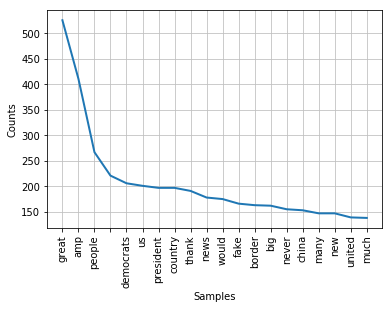

In [172]:
freq.plot(20, cumulative=False)

In [175]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_docs)
dictionary.save('/tmp/trump_corpora.dict')  # store the dictionary, for future reference
print(dictionary)

Dictionary(6911 unique tokens: ['200', '5', 'almost', 'bahamas', 'category']...)


In [176]:
dictionary.token2id

{'200': 0,
 '5': 1,
 'almost': 2,
 'bahamas': 3,
 'category': 4,
 'hit': 5,
 'like': 6,
 'mph': 7,
 'never': 8,
 'people': 9,
 'pray': 10,
 'winds': 11,
 '@gregabbotttx': 12,
 'also': 13,
 'enforcement': 14,
 'fbi': 15,
 'first': 16,
 'great': 17,
 'handling': 18,
 'job': 19,
 'law': 20,
 'others': 21,
 'responders': 22,
 'sad': 23,
 'shooting': 24,
 'situation': 25,
 'terrible': 26,
 'texas': 27,
 'thank': 28,
 'tough': 29,
 'tragedy': 30,
 'yesterday': 31,
 '': 32,
 'addition': 33,
 'alabama': 34,
 'already': 35,
 'anticipated': 36,
 'bless': 37,
 'careful': 38,
 'carolina': 39,
 'ever': 40,
 'everyone': 41,
 'florida': 42,
 'georgia': 43,
 'god': 44,
 'harder': 45,
 'hurricanes': 46,
 'largest': 47,
 'likely': 48,
 'looking': 49,
 'much': 50,
 'north': 51,
 'one': 52,
 'south': 53,
 'beginning': 54,
 '@debramessing': 55,
 'amp': 56,
 'announced': 57,
 'apprentice': 58,
 'became': 59,
 'big': 60,
 'calling': 61,
 'came': 62,
 'changed': 63,
 'even': 64,
 'failed': 65,
 'forgotten': 6

In [177]:
corpus = [dictionary.doc2bow(text) for text in clean_docs]
corpora.MmCorpus.serialize('/tmp/corpus.mm', corpus)  # store to disk, for later use
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(1, 1), (4, 1), (5, 1), (6, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(54, 1)], [(5, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1)], [(9, 1), (28, 1), (50, 1), (61, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (

In [178]:
from gensim import models

tfidf = models.TfidfModel(corpus)

In [180]:
from gensim import similarities
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)

In [184]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [187]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [188]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.095*"world" + 0.063*"long" + 0.049*"law" + 0.038*"taken" + 0.032*"shows" '
  '+ 0.028*"enforcement" + 0.019*"james" + 0.018*"course" + 0.015*"old" + '
  '0.014*"comey"'),
 (1,
  '0.143*"us" + 0.095*"want" + 0.058*"things" + 0.041*"absolutely" + '
  '0.039*"@foxnews" + 0.028*"go" + 0.027*"don’t" + 0.025*"hillary" + '
  '0.023*"totally" + 0.020*"start"'),
 (2,
  '0.122*"states" + 0.119*"united" + 0.096*"china" + 0.073*"free" + '
  '0.062*"got" + 0.027*"iran" + 0.016*"winning" + 0.011*"tried" + 0.011*"read" '
  '+ 0.009*"condolences"'),
 (3,
  '0.118*"american" + 0.076*"house" + 0.034*"white" + 0.031*"john" + '
  '0.027*"god" + 0.026*"healthcare" + 0.019*"bless" + 0.018*"freedom" + '
  '0.010*"nobody" + 0.010*"guy"'),
 (4,
  '0.115*"new" + 0.097*"anything" + 0.058*"russia" + 0.052*"“the" + '
  '0.040*"york" + 0.026*"times" + 0.025*"russian" + 0.018*"crazy" + '
  '0.018*"mark" + 0.017*"twitter"'),
 (5,
  '0.069*"record" + 0.061*"real" + 0.056*"entire" + 0.053*"congress" + '
  '0.

In [190]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -17.225727003668787

Coherence Score:  0.3780669062029286


In [192]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.437172 -0.205645       1        1  30.448278
6     -0.211446  0.375886       2        1  13.838591
12    -0.051519  0.018418       3        1   8.381357
1     -0.049687 -0.003911       4        1   6.720532
10     0.012101 -0.005571       5        1   5.929405
5      0.010792 -0.004700       6        1   4.330077
15     0.019317 -0.008630       7        1   3.794808
7      0.018741 -0.006620       8        1   3.453467
4      0.039083 -0.011061       9        1   3.212191
2      0.043362 -0.011592      10        1   3.099749
11     0.054512 -0.013251      11        1   2.620703
14     0.057300 -0.013670      12        1   2.495038
8      0.044200 -0.011710      13        1   2.217205
0      0.063658 -0.014210      14        1   1.857665
3      0.064619 -0.014262      15        1   1.822867
16     0.058400 -0.013692      16        1   1.791729
18     0.059342 -0.013803      17        1   1.491632
19     0.060704 -0.014044      18        1   1.426668
17     0.067433 -0.014362      19        1   1.011672
9      0.076259 -0.013572      20        1   0.056376, topic_info=     Category         Freq            Term        Total  loglift  logprob
56    Default   608.000000             amp   608.000000  30.0000  30.0000
17    Default  1019.000000           great  1019.000000  29.0000  29.0000
551   Default   356.000000              us   356.000000  28.0000  28.0000
536   Default   245.000000            done   245.000000  27.0000  27.0000
172   Default   292.000000       president   292.000000  26.0000  26.0000
733   Default   247.000000            dems   247.000000  25.0000  25.0000
273   Default   269.000000            make   269.000000  24.0000  24.0000
342   Default   367.000000          border   367.000000  23.0000  23.0000
183   Default   356.000000       democrats   356.000000  22.0000  22.0000
32    Default   349.000000                   349.000000  21.0000  21.0000
9     Default   588.000000          people   588.000000  20.0000  20.0000
153   Default   235.000000            want   235.000000  19.0000  19.0000
28    Default   169.000000           thank   169.000000  18.0000  18.0000
392   Default   323.000000           crime   323.000000  17.0000  17.0000
836   Default   178.000000           today   178.000000  16.0000  16.0000
180   Default   179.000000         america   179.000000  15.0000  15.0000
19    Default   230.000000             job   230.000000  14.0000  14.0000
764   Default   212.000000            know   212.000000  13.0000  13.0000
220   Default   140.000000          states   140.000000  12.0000  12.0000
472   Default   143.000000         history   143.000000  11.0000  11.0000
221   Default   137.000000          united   137.000000  10.0000  10.0000
717   Default   136.000000             new   136.000000   9.0000   9.0000
98    Default   418.000000             get   418.000000   8.0000   8.0000
233   Default   411.000000            many   411.000000   7.0000   7.0000
204   Default   387.000000         country   387.000000   6.0000   6.0000
584   Default   376.000000            news   376.000000   5.0000   5.0000
778   Default   116.000000        anything   116.000000   4.0000   4.0000
8     Default   361.000000           never   361.000000   3.0000   3.0000
129   Default   110.000000           china   110.000000   2.0000   2.0000
344   Default   144.000000          things   144.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
2825  Topic20     0.003008       happened”     1.276113   1.4304  -8.8409
6910  Topic20     0.003008            “hiv     1.276331   1.4303  -8.8409
2294  Topic20     0.003008           unity     1.276098   1.4304  -8.8409
2296  Topic20     0.003008              vs     1.276139   1.4304  -8.8409
2297  Topic20     0.003008      “assailing     1.276096   1.4305  -8.8409
2298  Topic20     0.003008     

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [205]:
sr.append('amp')

In [202]:
[word for word in flattened_tokens if not word in sr.append('amp')]

TypeError: argument of type 'NoneType' is not iterable

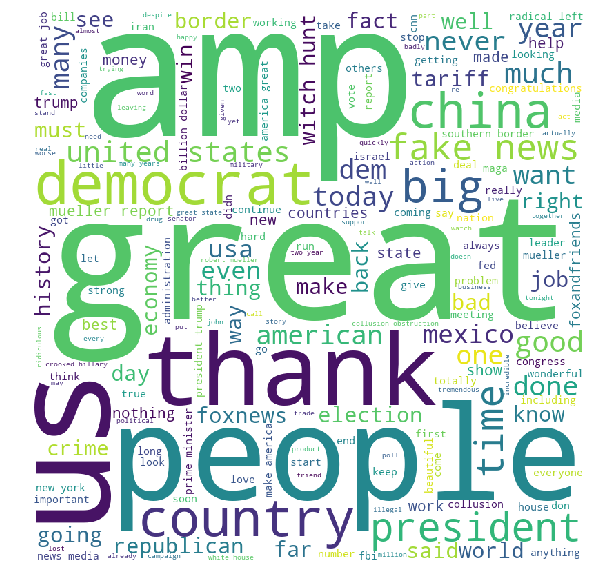

In [200]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sr.append('amp'), 
                min_font_size = 10).generate(' '.join(flattened_tokens)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 